# Predict the Sale Price of Bulldozers using Maching Learning

IN this notebook, we're walking through an example ML project with the goal of\
predicting the sale price of bulldozers.

ML workflow recall:
- Problem definition
  
  Given the data, how well can we predict the future sale price of a bulldozer.
- Prepare Data
  
  The data is downloaded from the KagglThe data for this competition is split into three parts:

  - Train.csv is the training set, which contains data through the end of 2011.
  - Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012\
    You make predictions on this set throughout the majority of the competition.\
    Your score on this set is used to create the public leaderboard.
  - Test.csv is the test set, which won't be released until the last week of the competition.\
    It contains data from May 1, 2012 - November 2012.\
    Your score on the test set determines your final rank for the competition.
- Evaluation
  
  The evaluation metric for this competition is the RMSLE(root mean squared log error) between\
  the actual and predicted auction prices.

  For more on the evaluation of this project check:
  [builldozers-competition-eval](www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation)\
  
  **Note:** The goal for most regression evaluation metrics is to minimize the error.\
  For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.
- Features scaling
  
  kaggale provides a data dictionary detailing all of the features of the dataset.
- Modeling
- Validating

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Discover the data

Let's import the data and take a look of its characters, have fun exploring.

In [5]:
# Import training and validation data sets
df = pd.read_csv("../../data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

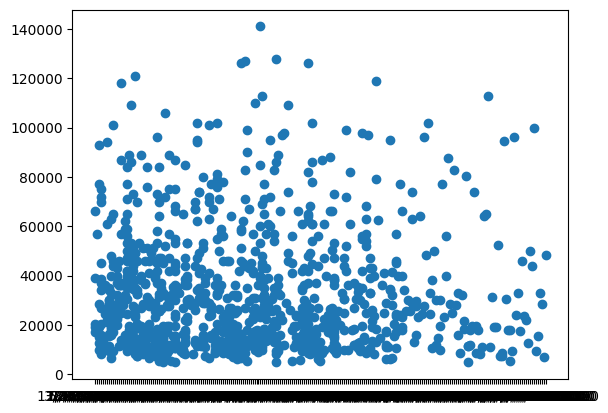

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

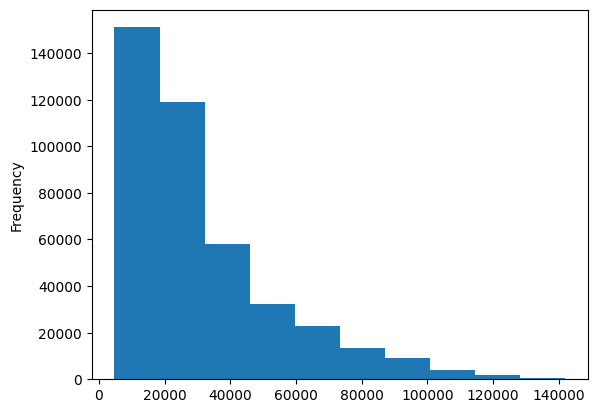

In [10]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.\
we can do that by telling pandas which of the columns has dates in it using the `parse_dates` param.\

In [11]:
# Re-import the data and parse the dates
df = pd.read_csv("../../data/bluebook-for-bulldozers/TrainAndValid.csv",
            low_memory=False,
            parse_dates=["saledate"])
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

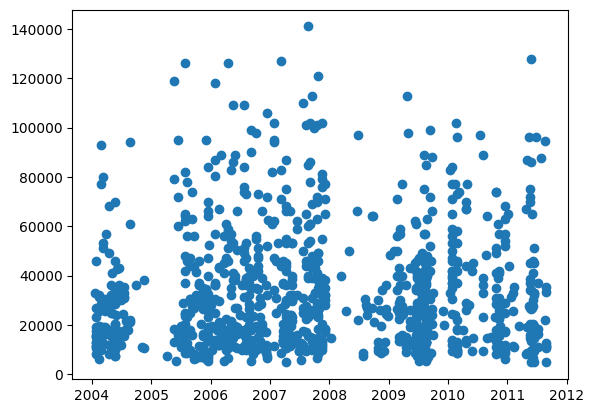

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, it's good to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Copy the original DataFrame to further explore and avoid changing the original copy.

In [15]:
# Make a copy
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [16]:
df_tmp["saledateYear"] = df_tmp.saledate.dt.year
df_tmp["saledateMonth"] = df_tmp.saledate.dt.month
df_tmp["saledateDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [17]:
# Let's drop the saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [18]:
# check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Preprocess Data

This procedure includes but not limited to clean data, fill missing values, convert data types.

In [19]:
# Split the data into validate and train sets
df_val = df_tmp[df_tmp.saledateYear == 2012].copy()
df_train = df_tmp[df_tmp.saledateYear != 2012].copy()

len(df_val), len(df_train)

(11573, 401125)

### Convert string to categories

One way to convert data into numbers is convert them into pandas catergories.
[Pandas Categorical](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html)

In [20]:
# find the columns which contains strings and covert them into category which will be treated as code by pandas.
for label, content in df_train.items():
  if pd.api.types.is_string_dtype(content):
    df_train[label] = content.astype("category").cat.as_ordered()

In [21]:
df_train.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

In [22]:
for label, content in df_val.items():
  if pd.api.types.is_string_dtype(content):
    df_val[label] = content.astype("category").cat.as_ordered()

In [23]:
df_val.state.cat.codes

405675    19
401133     7
406076    12
409018    21
409026    21
          ..
410879     3
412476     3
411927     3
407124     3
409203     3
Length: 11573, dtype: int8

### Fill missing values

#### Fill numeric missing values first

In [24]:
for label, content in df_train.items():
  if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
    print(label)
    df_train[label] = content.fillna(content.median()) # Median is more robust and fair than mean
     

auctioneerID
MachineHoursCurrentMeter


In [25]:
for label, content in df_val.items():
  if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
    print(label)
    df_val[label] = content.fillna(content.median()) # Median is more robust and fair than mean

MachineHoursCurrentMeter


In [26]:
df_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [27]:
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    7542
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type

#### Fill and convert categorical variables into numbers

In [28]:
# Check for volumns which aren't numeric
for label, content in df_train.items():
  if not pd.api.types.is_numeric_dtype(content):
    # The default category code for null value is -1, we add 1
    df_train[label] = pd.Categorical(content).codes + 1

In [29]:
# check
df_train.shape

(401125, 57)

In [30]:
df_train.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [31]:
for label, content in df_val.items():
  if not pd.api.types.is_numeric_dtype(content):
    # The default category code for null value is -1, we add 1
    df_val[label] = pd.Categorical(content).codes + 1

In [32]:
df_val.shape

(11573, 57)

In [33]:
df_val.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [34]:
%%time
# instantiate model

CPU times: user 13 μs, sys: 17 μs, total: 30 μs
Wall time: 280 μs


## Modeling

We can spend as much time discovering and optimizing datasets, however sometimes it's even better\
to initialize the the first modeling without spending too much time on the data.

In [35]:
# Split the data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

In [36]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

CPU times: user 43.3 s, sys: 695 ms, total: 44 s
Wall time: 18.5 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Note:** If you use the same data for scoring, the result will be awesone cause you trained the\
model with the exactly the same data.

We need to split the data into validation and test sets, and pre-process each set seperately,\
otherwise the valudation data(future data) will impact the test data, and the model training\
would not be fair.

### Build an evaluation function

In [37]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """_summary_

  calculate root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)
            }
  return scores

In [73]:
show_scores(model)

{'Training MAE': 5563.654842729822,
 'Valid MAE': 9889.246097813877,
 'Training RMSLE': np.float64(0.25781719121917157),
 'Valid RMSLE': np.float64(0.3938025593989505),
 'Training R^2': 0.8605952061882,
 'Valid R^2': 0.6507659521184419}

In [74]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)>

### Hyperperameter tuning with RandomSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Different RandomForestRegressor hyperparameters
rf_grid = {
  "n_estimators": np.arange(10, 100, 10),
  "max_depth": [None, 3, 5, 10],
  "min_samples_split": np.arange(2, 20, 2),
  "min_samples_leaf": np.arange(1, 20, 2),
  "max_features": [0.5, 1, "sqrt", "auto"],
  "max_samples": [10000]
}
# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(
  RandomForestRegressor(n_jobs=-1,random_state=42,),
  param_distributions=rf_grid,
  n_iter=200,
  cv=5,
  verbose=True
)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
265 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/ann

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,200
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [72]:
show_scores(rs_model)

{'Training MAE': 5889.780063769808,
 'Valid MAE': 10411.32208810775,
 'Training RMSLE': np.float64(0.2700065559150156),
 'Valid RMSLE': np.float64(0.4049012480049312),
 'Training R^2': 0.846353176120556,
 'Valid R^2': 0.652355740135578}

In [75]:
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

### Train a model with the best hyperparameters

Suppose that the best model is found after 100 iterations of `RandomizedSearchCV`.

In [76]:
# Most ideal hyperparameters
from sklearn.utils import all_estimators

ideal_model = RandomForestRegressor(
  n_estimators=70,
  min_samples_split=10,
  min_samples_leaf=1,
  max_samples=10000,
  max_features=0.5,
  max_depth=None,
  random_state=42
)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

,n_estimators,70
,criterion,'squared_error'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
show_scores(ideal_model)

{'Training MAE': 6212.523074984201,
 'Valid MAE': 10537.869063248063,
 'Training RMSLE': np.float64(0.2812509156851553),
 'Valid RMSLE': np.float64(0.40655799697768347),
 'Training R^2': 0.8280132116569933,
 'Valid R^2': 0.6312624430123959}

**Funny:** the first model scores better than the adjusted ideal model for Valid RNSLE

## Make predictions on test data

In [117]:
# Import the test data
df_test = pd.read_csv("../../data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [119]:
# We need pre-process the test data to keep it align with the format of training and validation data.
def preprocess(dtf):
  dtf["saledateYear"] = dtf.saledate.dt.year
  dtf["saledateMonth"] = dtf.saledate.dt.month
  dtf["saledateDay"] = dtf.saledate.dt.day
  dtf["saleDayOfWeek"] = dtf.saledate.dt.day_of_week
  dtf["saleDayOfYear"] = dtf.saledate.dt.day_of_year
  dtf.drop("saledate", axis=1, inplace=True)
  
  for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
      df_test[label] = content.astype("category").cat.as_ordered()
    
  for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
      df_test[label] = content.fillna(content.median()) # Median is more robust and fair than mean
    
  for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
      # The default category code for null value is -1, we add 1
      df_test[label] = pd.Categorical(content).codes + 1
      

In [120]:
preprocess(df_test)

In [121]:
df_test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [122]:
df_test.shape

(12457, 56)

In [123]:
df_test[:10]

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saledateYear,saledateMonth,saledateDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131
5,1227870,1068694,16747,121,3,2007,3670.0,1,1909,813,...,0,0,0,0,0,2012,5,3,3,124
6,1227871,1012262,9133,121,3,2005,6759.0,1,1903,811,...,0,0,0,0,0,2012,5,3,3,124
7,1227879,1064696,4699,121,3,1000,0.0,0,452,169,...,0,0,0,3,2,2012,5,3,3,124
8,1227880,1067175,22145,121,3,1000,5528.0,2,554,196,...,1,4,5,0,0,2012,5,3,3,124
9,1227881,1007429,423,121,3,2000,10572.0,3,1547,615,...,0,0,0,0,0,2012,5,3,3,124


In [124]:
# Make predictions on the test dataset
test_preds = model.predict(df_test)

In [125]:
print(test_preds)

[19812.5 27086.  52115.  ... 13607.5 15352.5 24630.8]


In [126]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19812.5
1,1227844,27086.0
2,1227847,52115.0
3,1227848,81670.0
4,1227863,41252.5
...,...,...
12452,6643171,45110.0
12453,6643173,12812.5
12454,6643184,13607.5
12455,6643186,15352.5


In [128]:
df_preds.to_csv("../../data/bluebook-for-bulldozers/annz_test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important\
when it predicts the target vairable(for example, SalesPrice).

In [129]:
# Find feature importance of the best model
model.feature_importances_

array([4.86908175e-02, 2.27530845e-02, 2.99948150e-02, 1.15684997e-03,
       6.07639023e-03, 2.52053316e-01, 4.50347019e-03, 1.74576161e-03,
       2.47956040e-02, 4.69516232e-02, 5.84079316e-02, 4.41156230e-03,
       6.42172647e-03, 2.18483551e-01, 3.16769940e-02, 1.17028695e-02,
       1.43286248e-03, 1.92896156e-03, 1.47676500e-03, 2.36230824e-02,
       9.74643211e-04, 2.64263529e-04, 1.58572976e-03, 2.21248274e-04,
       1.37700173e-03, 4.31565752e-05, 2.50687984e-03, 2.46404749e-02,
       2.23124504e-03, 1.74530971e-03, 6.33994787e-03, 3.78573949e-03,
       3.82748198e-03, 5.09105004e-04, 3.01770375e-03, 4.14713816e-03,
       1.63940479e-03, 2.59512220e-02, 1.64470235e-03, 1.01461639e-03,
       2.86964405e-04, 1.25962711e-03, 1.63799066e-03, 9.60003479e-04,
       7.54117807e-04, 9.25534582e-04, 2.62657545e-04, 2.90622862e-03,
       1.19207363e-03, 3.00676895e-04, 1.80360011e-04, 6.50423263e-02,
       4.74163379e-03, 1.31480745e-02, 6.61770867e-03, 1.40289688e-02])

In [136]:
print(type(model.feature_importances_))

<class 'numpy.ndarray'>


In [132]:
X_train.shape

(401125, 56)

In [149]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
  # Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"]
          [:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature Importance")
  ax.invert_yaxis()

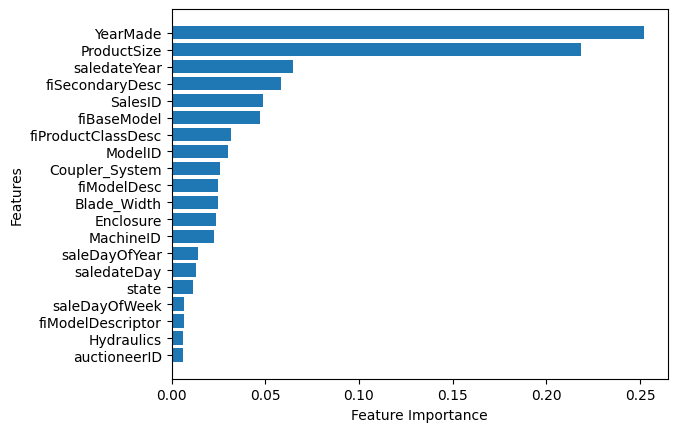

In [150]:
plot_features(X_train.columns, model.feature_importances_)

### Try Lasso

In [166]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [167]:
param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}
# Instantiate RandomizedSearchCV model
random_search = RandomizedSearchCV(lasso, param_dist, n_iter=10, cv=5)
# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.786e+13, tolerance: 1.726e+10
  model = cd_fast.enet_coordinate_descent(
/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.100e+13, tolerance: 1.758e+10
  model = cd_fast.ene

,estimator,Lasso()
,param_distributions,"{'alpha': [0.1, 1.0, ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [171]:
l_train_preds = random_search.predict(X_train)
l_val_preds = random_search.predict(X_valid)
print(r2_score(y_train, l_train_preds)),
print(r2_score(y_valid, l_val_preds))

0.41958612593410305
0.36261703418530944


In [172]:
l_test_preds = random_search.predict(df_test)
df_lm_preds = pd.DataFrame()
df_lm_preds["SalesID"] = df_test["SalesID"]
df_lm_preds["SalesPrice"] = l_test_preds
df_lm_preds

,SalesID,SalesPrice
0,1227829,21029.174316
1,1227844,28683.607514
2,1227847,46583.137305
3,1227848,51159.454339
4,1227863,29001.672491
...,...,...
12452,6643171,18828.179578
12453,6643173,34013.119763
12454,6643184,23613.273587
12455,6643186,34136.355249


In [173]:
df_lm_preds.to_csv("../../data/bluebook-for-bulldozers/annz_liner_model_test_predictions.csv", index=False)